# BESP 1D sinus

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3202


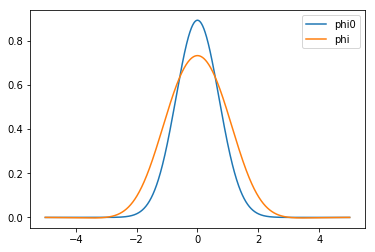

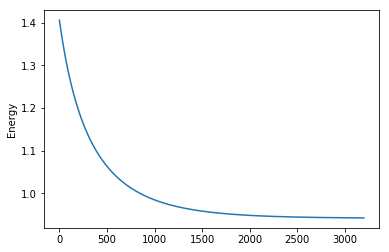

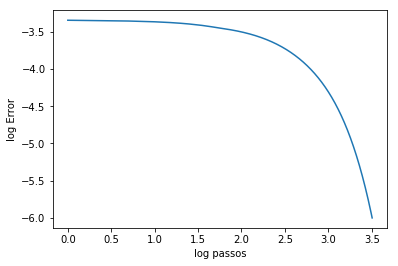

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.fftpack import dst, idst

np.set_printoptions(precision=3) # fer que numpy nomes faci print de 3 digits significatius
#discretització 1D
llarg = 10
interval = [-llarg/2, llarg/2]
punts = 1024
x = np.linspace(interval[0],interval[1],num=punts)
dx = llarg/(punts-1)

#definició de potencial, condició inicial i paràmetres
gamax = 1
V = 0.5* gamax* x**2
phi0 = (np.pi/2)**(-1/4)*np.exp(-x**2)
beta = 1
dt = 0.001
eps = 1e-6
#stabilization parameter
alfa = 0

#maxpas = 100

def energy(phi2): # phi2 no té els índexs 0 i M
    E = dx * np.sum(V*abs(phi2)**2+ 0.5*beta*abs(phi2)**4)
    phipos = np.append(phi2,0)
    phineg = np.append(0,phi2)
    E = E + 1/dx * np.sum(abs(phipos-phineg)**2)
    return E

#metode numeric
error = 1e4
phi = phi0
pas = 0
Evec = []
errorvec = []
while (error > eps): #and pas < 100
    error2 = 1e4
    eps2 = 1e-6
    pas2 = 0
    g = alfa - V - beta*abs(phi)**2
    psi = dst(phi)
    phi1 = phi
    
    while(error2 > eps2): #and pas2 < 100
        G = g * phi1
        Gtilla = dst(G)
        mu = np.pi/llarg * np.arange(0, punts)
        psi1 = 2/(2 + dt*(2*alfa + mu**2)) * (psi + dt*Gtilla)
        phi2 = idst(psi1)/(2*(punts+1))
        error2 = max(abs(phi2 - phi1))
        phi1 = phi2
        pas2 += 1
        
    norm = np.sqrt(dx * np.dot(phi1,phi1))
    phi2 = phi1/norm
    error = np.max(np.abs(phi2-phi))
    phi = phi2
    if pas%1e2 == 0:
        print(pas)
    if pas%5 == 0: #guardem les energies cada 100 passos
        E = energy(phi)
        Evec = Evec + [E]
        errorvec = errorvec + [np.log10(error)]
    pas += 1

#sol = np.append(0, phi)
#sol = np.append(sol, 0)
sol = phi
print(pas)
# print(sol)


fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x,phi0, label = 'phi0')
ax.plot(x,sol, label = 'phi')
ax.legend()
plt.show()


pasvec = np.arange(0,pas,5)
plt.plot(pasvec,Evec)
plt.ylabel('Energy')
plt.show()

pasvec[0] += 1
pasvec2 = np.log10(pasvec)
plt.plot(pasvec2,errorvec)
plt.ylabel('log Error')
plt.xlabel('log passos')
plt.show()

# BEFD 1D

0
100
200
300
400
407


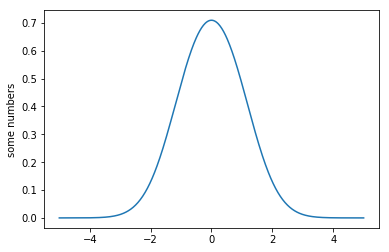

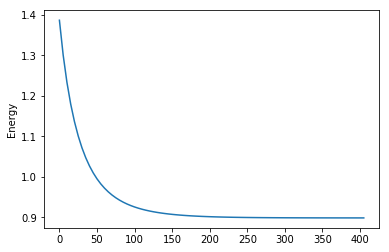

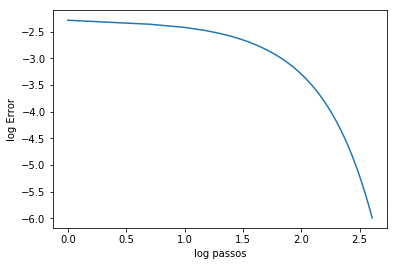

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3) # fer que numpy nomes faci print de 3 digits significatius
#discretització 1D
llarg = 10
interval = [-llarg/2, llarg/2]
punts = 512
x = np.linspace(interval[0],interval[1],num=punts)
dx = llarg/(punts-1)

#definició de potencial, condició inicial i paràmetres
gamax = 1
V = 0.5* gamax* x**2
phi0 = (np.pi/2)**(-1/4)*np.exp(-x**2)
beta = 1
dt = 0.01
eps = 1e-6
#maxpas = 100

def energy(phi2): # phi2 no té els índexs 0 i M
    E = dx * np.sum(V[1:-1]*abs(phi2)**2+ 0.5*beta*abs(phi2)**4)
    phipos = np.append(phi2,0)
    phineg = np.append(0,phi2)
    E = E + 1/dx * np.sum(abs(phipos-phineg)**2)
    return E

#metode numeric
error = 1e4
#phi2[0] = 0, phi2[M] = 0, resolem per ph2[i], i =1...M-1
phi = phi0[1:-1]
pas = 0
Evec = []
errorvec = []
while (error > eps):
    A = np.eye(punts-2) + dt* np.diag(V[1:-1]) + beta* dt* np.diag(abs(phi))**2 
    A = A -(0.5*dt/dx**2)*(np.diag(-2*np.ones(punts-2))+ np.diag(1*np.ones(punts-3),-1) +np.diag(1*np.ones(punts-3),1))
    phi2 = np.linalg.solve(A,phi)
    norm = np.sqrt(dx * np.dot(phi2,phi2))
    phi2 = phi2/norm
    error = np.max(np.abs(phi2-phi))
    phi = phi2
    
    if pas%100 == 0:
        print(pas)
    if pas%5 == 0: #guardem les energies cada 100 passos
        E = energy(phi2)
        Evec = Evec + [E]
        errorvec = errorvec + [np.log10(error)]
    pas += 1

soleuler = np.append(0, phi)
soleuler = np.append(soleuler, 0)
print(pas)
# print(soleuler)

plt.plot(x,soleuler)
plt.ylabel('some numbers')
plt.show()

pasvec = np.arange(0,pas,5)
plt.plot(pasvec,Evec)
plt.ylabel('Energy')
plt.show()

pasvec[0] += 1
pasvec2 = np.log10(pasvec)
plt.plot(pasvec2,errorvec)
plt.ylabel('log Error')
plt.xlabel('log passos')
plt.show()

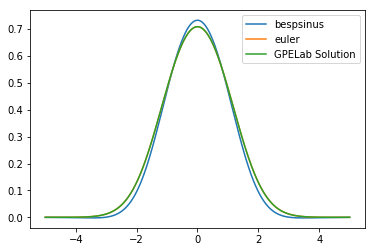

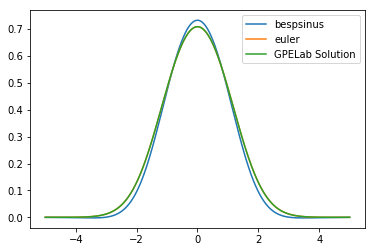

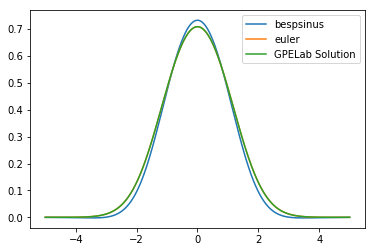

In [36]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(np.linspace(-llarg/2, llarg/2, 1024), sol, label = 'bespsinus')
ax.plot(np.linspace(-llarg/2, llarg/2, 512), soleuler, label = 'euler')
ax.plot(np.linspace(-llarg/2, llarg/2, 1025), content, label = 'GPELab Solution')
ax.legend()
plt.show()

In [30]:
with open('test3.txt') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

content = [float(i) for i in content]

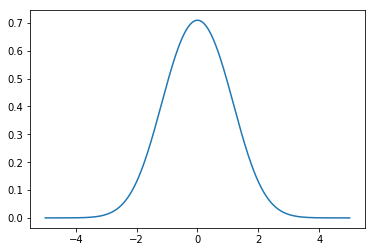

In [31]:
plt.plot(np.linspace(-5, 5, 1025), content)
plt.show()